##5. 교재 5장 심화문제

5.1

In [ ]:
import numpy as np
import pandas as pd

# data = pd.DataFrame({
#     "닥스훈트(0)" : [[75,24],[77,29],[83,19],[81,32],[73,21],[99,22],[72,19],[83,34]],
#     "사모예드(1)" : [[76,55],[78,58],[82,53],[88,54],[76,61],[83,52],[81,57],[89,64]],
#     "말티즈(2)" : [[35,23],[39,26],[38,19],[41,30],[30,21],[57,24],[41,28],[35,20]]
# })
# print(data.iloc[:,0])

dach = [[75,24],[77,29],[83,19],[81,32],[73,21],[99,22],[72,19],[83,34]]    #닥스훈트
samo = [[76,55],[78,58],[82,53],[88,54],[76,61],[83,52],[81,57],[89,64]]    #사모예드
malt = [[35,23],[39,26],[38,19],[41,30],[30,21],[57,24],[41,28],[35,20]]    #말티즈

print("닥스훈트(0) :",dach)
print("사모예드(1) :",samo)
print("말티즈(2) :",malt)


dach_length = [75,77,83,81,73,99,72,83]
dach_height = [24,29,19,31,21,22,19,34]

samo_length = [76,78,82,88,76,83,81,89]
samo_height = [55,58,53,54,61,52,57,64]

malt_length = [35,39,38,41,30,57,41,35]
malt_height = [23,26,19,30,21,24,28,20]

d_data = np.column_stack((dach_length,dach_height))
s_data = np.column_stack((samo_length,samo_height))
m_data = np.column_stack((malt_length,malt_height))

d_label = np.zeros(len(d_data))
s_label = np.ones(len(s_data))
m_label = np.zeros(len(m_data))+2

dog_classes = {0:'닥스훈트', 1:'사모예드', 2:'말티즈'}

닥스훈트(0) : [[75, 24], [77, 29], [83, 19], [81, 32], [73, 21], [99, 22], [72, 19], [83, 34]]
사모예드(1) : [[76, 55], [78, 58], [82, 53], [88, 54], [76, 61], [83, 52], [81, 57], [89, 64]]
말티즈(2) : [[35, 23], [39, 26], [38, 19], [41, 30], [30, 21], [57, 24], [41, 28], [35, 20]]


5.2

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn import metrics

dogs = np.concatenate((d_data,s_data,m_data))
labels = np.concatenate((d_label,s_label,m_label))

k=3
knn = KNeighborsClassifier(n_neighbors= k)
knn.fit(dogs,labels)

y_pred = knn.predict(dogs)
matrix = confusion_matrix(labels, y_pred)
print(matrix)

[[8 0 0]
 [0 8 0]
 [1 0 7]]


5.3

In [ ]:
A = [58,30]
B = [80,26]
C = [80,41]
D = [75,55]

list_data = [A,B,C,D]
list_name = ['A','B','C','D']

for i in range(len(list_data)):
  print(list_name[i],"데이터 분류결과")
  input_data = [list_data[i]]
  for k in range(3,8,2):
    knn = KNeighborsClassifier(n_neighbors= k)
    knn.fit(dogs,labels)
    y_pred = knn.predict(input_data)
    print(list_name[i],list_data[i],": n_neighbors가",k,"일때 :",dog_classes[y_pred[0]])
  print()

A 데이터 분류결과
A [58, 30] : n_neighbors가 3 일때 : 말티즈
A [58, 30] : n_neighbors가 5 일때 : 말티즈
A [58, 30] : n_neighbors가 7 일때 : 닥스훈트

B 데이터 분류결과
B [80, 26] : n_neighbors가 3 일때 : 닥스훈트
B [80, 26] : n_neighbors가 5 일때 : 닥스훈트
B [80, 26] : n_neighbors가 7 일때 : 닥스훈트

C 데이터 분류결과
C [80, 41] : n_neighbors가 3 일때 : 닥스훈트
C [80, 41] : n_neighbors가 5 일때 : 닥스훈트
C [80, 41] : n_neighbors가 7 일때 : 사모예드

D 데이터 분류결과
D [75, 55] : n_neighbors가 3 일때 : 사모예드
D [75, 55] : n_neighbors가 5 일때 : 사모예드
D [75, 55] : n_neighbors가 7 일때 : 사모예드



5.4

k값에 영향을 받지 않는 데이터는 B,D이다.  
그 이유는 scatter를 찍어봤을 때 A,C는 분류되는 클래스의 결정 경계 주변에 존재하여 다른 클래스로 분류될 가능성이 존재하지만
B,D의 경우에는 형성되는 클래스의 중심부에 가까이 있어 다른 클래스로 분류될 가능성이 낮다.

5.5

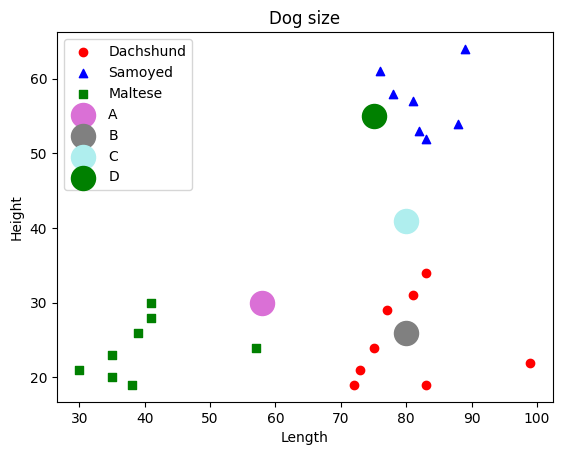

In [ ]:
import matplotlib.pyplot as plt

plt.scatter(dach_length, dach_height, c='red',label="Dachshund")
plt.scatter(samo_length, samo_height, c='blue', marker = '^',label="Samoyed")
plt.scatter(malt_length, malt_height, c='green', marker = 's',label="Maltese")

plt.scatter(A[0],A[1],s=300, c='orchid',label = "A")
plt.scatter(B[0],B[1],s=300, c='gray',label = "B")
plt.scatter(C[0],C[1],s=300, c='paleturquoise',label = "C")
plt.scatter(D[0],D[1],s=300, c='green',label = "D")

plt.xlabel('Length')
plt.ylabel('Height')
plt.title("Dog size")
plt.legend(loc='upper left')

5.6

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Text(0.5, 1.0, 'k-Means clustering, k=4')

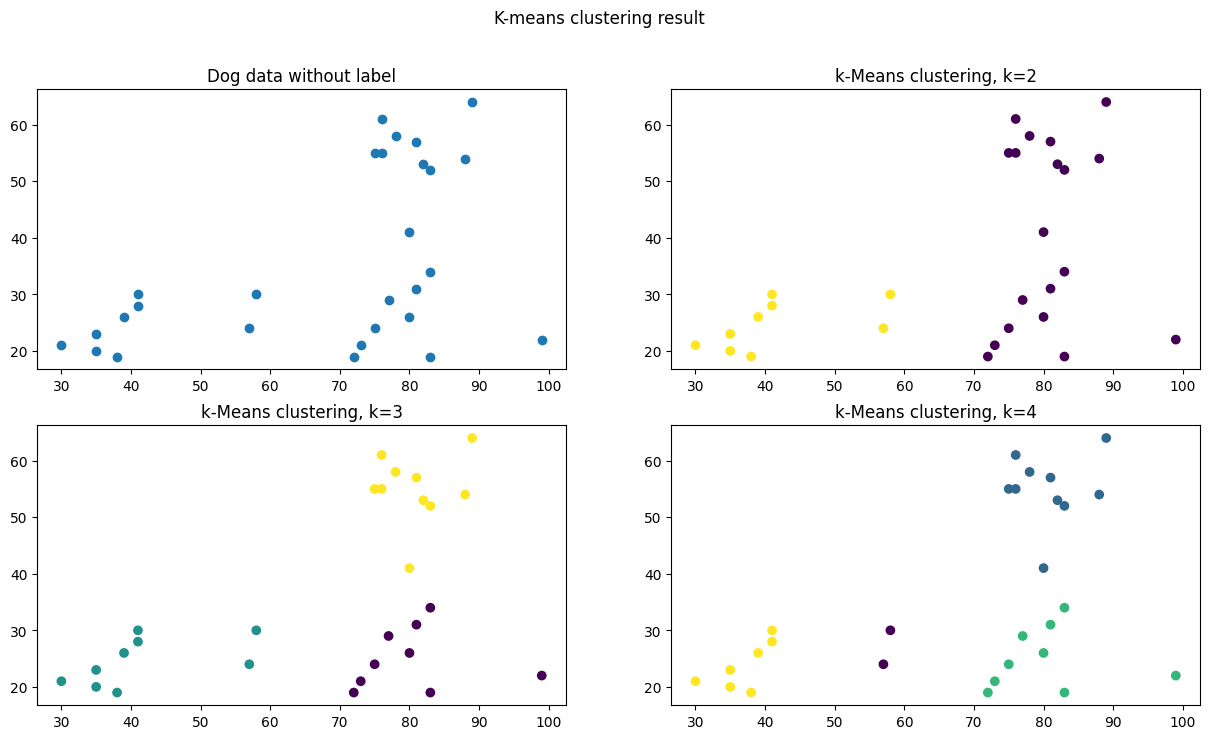

In [ ]:
from sklearn import cluster

length = [75,77,83,81,73,99,72,83,76,78,82,88,76,83,81,89,35,39,38,41,30,57,41,35,58,80,80,75]
height = [24,29,19,31,21,22,19,34,55,58,53,54,61,52,57,64,23,26,19,30,21,24,28,20,30,26,41,55]
data = np.column_stack((length,height))


fig, axs = plt.subplots(2,2,figsize=(15,8))
fig.suptitle("K-means clustering result")

axs[0, 0].scatter(length, height)
axs[0, 0].set_title("Dog data without label")

kmeans = cluster.KMeans(n_clusters=2).fit(data)
axs[0, 1].scatter(length,height, c=kmeans.predict(data))
axs[0, 1].set_title("k-Means clustering, k=2")

kmeans = cluster.KMeans(n_clusters=3).fit(data)
axs[1, 0].scatter(length,height, c=kmeans.predict(data))
axs[1, 0].set_title("k-Means clustering, k=3")

kmeans = cluster.KMeans(n_clusters=4).fit(data)
axs[1, 1].scatter(length,height, c=kmeans.predict(data))
axs[1, 1].set_title("k-Means clustering, k=4")
